In [2]:
import os
import json
import glob
import copy
import copy
import itertools
import pprint 
pp = pprint.PrettyPrinter(indent=4)

import numpy as np
import pylab as pl
import seaborn as sns
import pandas as pd
import statsmodels as sm
import cPickle as pkl

from scipy import stats as spstats

#from pipeline.python.retinotopy import fit_2d_rfs as fitrf
#from pipeline.python.retinotopy import convert_coords as coords

from pipeline.python.classifications import experiment_classes as util
#from pipeline.python.classifications import retino_structure as ret
from pipeline.python.classifications import aggregate_data_stats as aggr
#from pipeline.python.classifications import rf_utils as rfutils

from pipeline.python import utils as putils #.utils import natural_keys, label_figure, convert_range

from matplotlib.lines import Line2D



In [ ]:
%matplotlib notebook

In [3]:
reload(aggr)

<module 'pipeline.python.classifications.aggregate_data_stats' from '/home/julianarhee/Repositories/2p-pipeline/pipeline/python/classifications/aggregate_data_stats.py'>

# Colors

In [4]:
# visual_areas = ['V1', 'Lm', 'Li']
# colors = ['k', 'royalblue', 'darkorange'] #sns.color_palette(palette='colorblind') #, n_colors=3)
# area_colors = {'V1': colors[0], 'Lm': colors[1], 'Li': colors[2]}
visual_areas = ['V1', 'Lm', 'Li']
colors = ['magenta', 'orange', 'dodgerblue'] #sns.color_palette(palette='colorblind') #, n_colors=3)
area_colors = {'V1': colors[0], 'Lm': colors[1], 'Li': colors[2]}

#### Plot params
pl.rcParams["axes.labelsize"] = 16
pl.rcParams["xtick.labelsize"] = 12
pl.rcParams["ytick.labelsize"] = 12

dpi = 150

# Dataset info

In [5]:
#### Set trace ID and FOV/state type
traceid = 'traces001'
fov_type = 'zoom2p0x'
state = 'awake'
aggregate_dir = '/n/coxfs01/julianarhee/aggregate-visual-areas'

#### Preprocessing params
responsive_test = 'ROC' #None
responsive_thr = 0.05 #None
n_stds = None

#### RF fit params
response_type = 'dff'
# fit_thr=0.5

#### Set outputdir for current analysis
#fit_desc = fitrf.get_fit_desc(response_type=response_type)
# outdir = os.path.join(aggregate_dir, 'receptive-fields', '%s__%s' % (traceid, fit_desc))
# if not os.path.exists(outdir):
#     os.makedirs(outdir)
# print("... saving output to base dir:\n%s" % outdir)


In [6]:
#### Create data ID for labeling figures with data-types
data_id = '|'.join([traceid, '%s_resptest-%s_respthr-%.2f' % (response_type, responsive_test, responsive_thr)])

filter_by = 'unique_a'
data_id = '%s|%s' % (data_id, filter_by)
print(data_id)


traces001|dff_resptest-ROC_respthr-0.05|unique_a


In [7]:
# Get all data sets
sdata = aggr.get_aggregate_info(traceid=traceid, fov_type=fov_type, state=state)

In [8]:
sdata.groupby(['visual_area', 'animalid', 'session', 'fov']).count()

experiment  fovnum
visual_area animalid session  fov                              
Li          JC076    20190422 FOV1_zoom2p0x           2       2
                     20190502 FOV1_zoom2p0x           2       2
            JC080    20190602 FOV1_zoom2p0x           2       2
            JC089    20190522 FOV1_zoom2p0x           4       4
            JC090    20190605 FOV1_zoom2p0x           4       4
            JC091    20190602 FOV1_zoom2p0x           5       5
                     20190606 FOV1_zoom2p0x           4       4
                     20190607 FOV1_zoom2p0x           4       4
                     20190614 FOV1_zoom2p0x           4       4
                     20191007 FOV1_zoom2p0x           2       2
                     20191008 FOV1_zoom2p0x           4       4
            JC092    20190527 FOV2_zoom2p0x           1       1
                              FOV3_zoom2p0x           3       3
                     20190528 FOV1_zoom2p0x           2       2
            JC099    20190609 FOV1_zoom2p0x           4       4
                     20190612 FOV1_zoom2p0x           4       4
                     20190617 FOV1_zoom2p0x           4       4
            JC111    20191003 FOV1_zoom2p0x           2       2
            JC113    20191012 FOV1_zoom2p0x           2       2
                              FOV2_zoom2p0x           2       2
                     20191017 FOV1_zoom2p0x           3       3
                     20191018 FOV1_zoom2p0x           4       4
            JC117    20191104 FOV1_zoom2p0x           2       2
                     20191105 FOV1_zoom2p0x           4       4
            JC120    20191106 FOV1_zoom2p0x           2       2
                     20191111 FOV1_zoom2p0x           4       4
Lm          JC076    20190423 FOV1_zoom2p0x           2       2
            JC078    20190430 FOV1_zoom2p0x           3       3
                     20190504 FOV1_zoom2p0x           3       3
                     20190509 FOV1_zoom2p0x           3       3
...                                                 ...     ...
            JC083    20190517 FOV1_zoom2p0x           6       6
            JC084    20190525 FOV1_zoom2p0x           4       4
            JC091    20190627 FOV1_zoom2p0x           4       4
            JC097    20190615 FOV3_zoom2p0x           1       1
                     20190618 FOV1_zoom2p0x           5       5
            JC110    20191004 FOV3_zoom2p0x           2       2
                              FOV4_zoom2p0x           1       1
            JC113    20191012 FOV3_zoom2p0x           2       2
                     20191108 FOV1_zoom2p0x           2       2
            JC117    20191104 FOV2_zoom2p0x           2       2
                     20191111 FOV2_zoom2p0x           2       2
            JC120    20191106 FOV4_zoom2p0x           1       1
V1          JC076    20190420 FOV1_zoom2p0x           3       3
                     20190501 FOV1_zoom2p0x           3       3
            JC083    20190507 FOV1_zoom2p0x           3       3
                     20190510 FOV1_zoom2p0x           3       3
                     20190511 FOV1_zoom2p0x           4       4
            JC084    20190522 FOV1_zoom2p0x           4       4
            JC085    20190622 FOV1_zoom2p0x           5       5
            JC097    20190613 FOV1_zoom2p0x           5       5
                     20190615 FOV1_zoom2p0x           1       1
                              FOV2_zoom2p0x           2       2
                     20190616 FOV1_zoom2p0x           5       5
                     20190617 FOV1_zoom2p0x           4       4
            JC110    20191004 FOV1_zoom2p0x           1       1
                              FOV2_zoom2p0x           2       2
                     20191006 FOV1_zoom2p0x           5       5
            JC113    20191108 FOV2_zoom2p0x           2       2
            JC117    20191111 FOV1_zoom2p0x           2       2
            JC120    20191106 FOV3_zoom2p0x           1       1

[66 rows x 2

In [9]:
sdata_blobs = pd.concat([g for k, g in sdata.groupby(['animalid', 'session', 'fov']) if 
                        'blobs' in g['experiment'].values 
                         and ('rfs' in g['experiment'].values or 'rfs10' in g['experiment'].values)])

#sdata_blobs = sdata[sdata['experiment']=='blobs'].copy()
sdata_blobs[['visual_area', 'animalid', 'session', 'fov']].drop_duplicates().groupby(['visual_area']).count()

,animalid,session,fov
visual_area,,,
Li,13,13,13
Lm,12,12,12
V1,11,11,11


In [17]:
reload(aggr)

<module 'pipeline.python.classifications.aggregate_data_stats' from '/home/julianarhee/Repositories/2p-pipeline/pipeline/python/classifications/aggregate_data_stats.py'>

In [18]:
blobmeta = aggr.get_blob_datasets(filter_by=filter_by, as_dict=True)
for k, v in blobmeta.items():
    print('%s: %i datasets' % (k, len(v)))

V1: 7 datasets
Lm: 6 datasets
Li: 8 datasets


In [19]:
blobmeta

{'Li': ['20190605_JC090',
  '20190617_JC099',
  '20191018_JC113',
  '20191105_JC117',
  '20191111_JC120',
  '20190602_JC091',
  '20190614_JC091',
  '20190612_JC099'],
 'Lm': ['20190513_JC078',
  '20190603_JC080',
  '20190525_JC084',
  '20190627_JC091',
  '20190618_JC097',
  '20190512_JC083'],
 'V1': ['20190511_JC083',
  '20190522_JC084',
  '20190622_JC085',
  '20190613_JC097',
  '20190616_JC097',
  '20190617_JC097',
  '20191006_JC110']}

In [20]:
def melt_square_matrix(df, metric_name='value', include_diagonal=False):
    
    k = 0 if include_diagonal else 1
    df = df.where(np.triu(np.ones(df.shape), k=k).astype(np.bool))

    df = df.stack().reset_index()
    df.columns=['row', 'col', metric_name]
    return df

In [40]:
from scipy import interpolate
def resample_traces(samples, in_rate=44.65, out_rate=20.0):

    n_in_samples= len(samples)
    in_samples = samples.copy() #[rid, :] #np.array(tracef['File%03d' % curr_file][trace_type][:])
    in_tpoints = np.arange(0, n_in_samples) #len(in_samples))

    n_out_samples = round(n_in_samples * out_rate/in_rate)
    #print("N out samples: %i" % n_out_samples)

    flinear = interpolate.interp1d(in_tpoints, in_samples, axis=0)

    out_tpoints = np.linspace(in_tpoints[0], in_tpoints[-1], n_out_samples)
    out_samples = flinear(out_tpoints)
    #print("Out samples:", out_samples.shape)
    
    return out_tpoints, out_samples


# Test 1 dataset

In [29]:
animalid = 'JC084'
session = '20190522'
fovnum = 1

responsive_test = 'nstds' #'ROC'
responsive_thr = 10 #0.05
n_stds=2.5

response_type = 'dff'

experiment = 'blobs'

In [31]:
reload(aggr)

<module 'pipeline.python.classifications.aggregate_data_stats' from '/home/julianarhee/Repositories/2p-pipeline/pipeline/python/classifications/aggregate_data_stats.pyc'>

In [32]:

traces, labels, sdf = aggr.load_traces(animalid, session, fovnum, experiment, traceid=traceid, 
                                      responsive_test=responsive_test, 
                                       responsive_thr=responsive_thr, n_stds=n_stds)
trialmeans = aggr.traces_to_trials(traces, labels, epoch='stimulus')

datakey = '_'.join([session, animalid, 'fov%i' % fovnum])

Creating blobs object [JC084|20190522|FOV1_zoom2p0x|traces001]
... exp.load()
... loading saved data array (dff).
... updating self
... getting responsive cells (test: nstds, thr: 10.00')
... loading stats
182 of 260 cells responsive


<IPython.core.display.Javascript object>


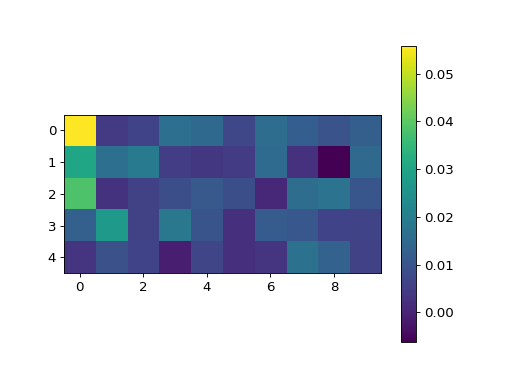

In [75]:
rid=39
tm = trialmeans.groupby(['config']).mean()[rid].reshape(10,5).T
pl.figure()
pl.imshow(tm)
pl.colorbar()

# Downsample, calculate activity correlations

In [106]:
# Temporal binning params
n_frames_bin = 11.
framerate = 44.65
new_framerate = framerate/n_frames_bin
print("Downsampled fr: %.2f Hz" % new_framerate)

# Pupil alignment params
#pre_ITI_ms=500
#post_ITI_ms=500 #pre_ITI_ms
#epoch='trial_alignment'

#### Get indices of trial epochs to model
#pre_flank = round((pre_ITI_ms/1E3)*44.65) #n_on/2.
#post_flank = round((post_ITI_ms/1E3)*44.65)  #n_on


Downsampled fr: 4.06 Hz


In [149]:
#### Get trial epochs
stim_on = float(labels['stim_on_frame'].unique())
n_on = float(labels['nframes_on'].unique())
nframes_per_trial = labels.groupby(['trial']).count().iloc[0][0]

#### Get indices of trial epochs to model
start_ix = 0 #int(stim_on-pre_flank)
end_ix = nframes_per_trial #int(stim_on + n_on + post_flank + 1)
#print(start_ix, end_ix, end_ix-start_ix)

#### Get resampled indices of trial epochs
_, out_ixs = resample_traces(np.arange(start_ix, end_ix), in_rate=44.65, out_rate=new_framerate)
new_stim_on = int(np.where(abs(out_ixs-stim_on) == min(abs(out_ixs-stim_on)))[0])
new_n_on = int(round(n_on / 2.))

#### Get sample roi trace for dims
roi_list = traces.columns.tolist()


#roi_traces=[]
r_list=[]
for rid in roi_list:
    
    # Create trial mat, downsampled: shape = (ntrials, nframes_per_trial)
    trialmat = pd.DataFrame(np.vstack([traces[rid][tg.index] for trial, tg in labels.groupby(['trial'])]),\
                            index=[int(trial[5:]) for trial, tg in labels.groupby(['trial'])])
    configs_on_included_trials = [tg['config'].unique()[0] for trial, tg in labels.groupby(['trial'])]
    #included_trials = [trial for trial, tg in labels.groupby(['trial'])]

    #### Bin traces - Each tbin is a column, each row is a sample 
    sample_data = trialmat.fillna(method='pad').copy()
    binned_trialmat = sample_data.T.groupby(np.arange(len(sample_data.columns))//n_frames_bin, axis=0).mean().T
    n_tbins = np.ceil(trialmat.shape[1] / n_frames_bin)

    #### Zscore traces 
    zscored_neural = binned_trialmat / binned_trialmat.values.ravel().std()

    # Reshape roi traces
    cfg_list = np.hstack([[c for _ in np.arange(0, n_tbins)] for c in configs_on_included_trials])
    r_ = zscored_neural.T.unstack().reset_index() # level_0=trial number, level_1=frame number
    r_.rename(columns={'level_0': 'trial', 'level_1': 'frame_ix', 0: rid}, inplace=True)
    r_['config'] = cfg_list

    r_list.append(r_)
    
df = pd.concat(r_list, axis=1)
_, i = np.unique(df.columns, return_index=True)
df = df.iloc[:, i]

<IPython.core.display.Javascript object>


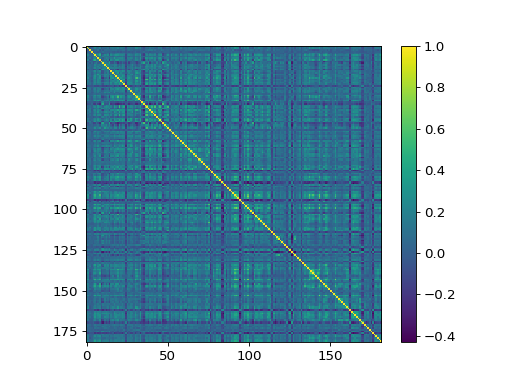

In [216]:
pl.figure()
pl.imshow(df[roi_list].corr())
pl.colorbar()

In [205]:
rid = 5 #39 #roi_list[0]

# Create trial mat, downsampled: shape = (ntrials, nframes_per_trial)
trialmat = pd.DataFrame(np.vstack([traces[rid][tg.index] for trial, tg in labels.groupby(['trial'])]),\
                        index=[int(trial[5:]) for trial, tg in labels.groupby(['trial'])])
configs_on_included_trials = [tg['config'].unique()[0] for trial, tg in labels.groupby(['trial'])]
included_trials = [trial for trial, tg in labels.groupby(['trial'])]


#### Bin traces - Each tbin is a column, each row is a sample 
sample_data = trialmat.fillna(method='pad').copy()
binned_trialmat = sample_data.T.groupby(np.arange(len(sample_data.columns))//n_frames_bin, axis=0).mean().T
n_tbins = np.ceil(trialmat.shape[1] / n_frames_bin)

#### Zscore traces 
zscored_neural = binned_trialmat / binned_trialmat.values.ravel().std()

# Reshape roi traces
cfg_list = np.hstack([[c for _ in np.arange(0, n_tbins)] for c in configs_on_included_trials])
r_ = zscored_neural.T.unstack().reset_index() # level_0=trial number, level_1=frame number
r_.rename(columns={'level_0': 'trial', 'level_1': 'frame_ix', 0: rid}, inplace=True)
r_['config'] = cfg_list


In [206]:
# Check with known config, known RID
ml=53 #-1
sz=10
print(sdf[(sdf['morphlevel']==ml) & (sdf['size']==sz)])
cfg = sdf[(sdf['morphlevel']==ml) & (sdf['size']==sz)].index[0]
trial_ixs = np.array([int(t[5:]) for t in labels[labels['config']==cfg]['trial'].unique()])

          color morphlevel   object  size stimtype xpos ypos yrot
config026               53  morph53  10.0    image   20   -8    0


<IPython.core.display.Javascript object>


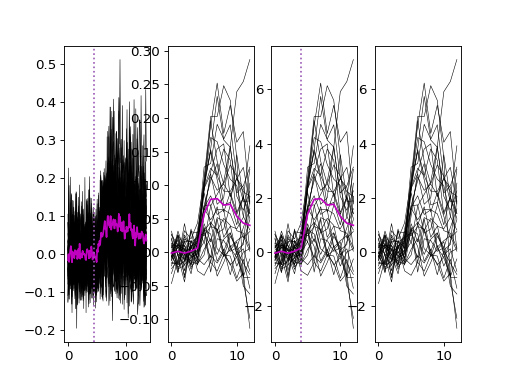

In [208]:
fig, axn = pl.subplots(1, 4)
ax=axn[0]
ax.plot(trialmat.loc[trial_ixs].values.T, 'k', lw=0.5)
ax.plot(np.nanmean(trialmat.loc[trial_ixs].values.T, axis=1), 'm')
ax.axvline(x=stim_on, ls=':')

ax=axn[1]
ax.plot(binned_trialmat.loc[trial_ixs].values.T, 'k', lw=0.5)
ax.plot(np.nanmean(binned_trialmat.loc[trial_ixs].values.T, axis=1), 'm')

ax=axn[2]
ax.plot(zscored_neural.loc[trial_ixs].values.T, 'k', lw=0.5)
ax.plot(np.nanmean(zscored_neural.loc[trial_ixs].values.T, axis=1), 'm')
ax.axvline(x=new_stim_on, ls=':')

ax=axn[3]
for tr, g in df[df['config']==cfg].groupby(['trial']):
    ax.plot(g[rid].values.T, 'k', lw=0.5)


In [210]:
df[roi_list].shape

(19500, 182)

In [ ]:
experiment = 'blobs'
MEANS = {}
BINNED = {}
cc_list = []
tt_list = []
for (visual_area, animalid, session, fovnum), g in sdata_blobs.groupby(['visual_area', 'animalid', 'session', 'fovnum']):
    dict_key = '%s_%s' % (session, animalid)
    if dict_key not in blobmeta[visual_area]:
        print("[%s] skipping %s" % (visual_area, dict_key))
        continue

    traces, labels, sdf = aggr.load_traces(animalid, session, fovnum, experiment, traceid=traceid, 
                                          responsive_test=responsive_test, 
                                           responsive_thr=responsive_thr, n_stds=None)
    trialmeans = aggr.traces_to_trials(traces, labels, epoch='stimulus')
    
    datakey = '_'.join([session, animalid, 'fov%i' % fovnum])
    MEANS[datakey] = trialmeans

    roi_list = np.array([r for r in trialmeans.columns if r!='config'])
    cc = melt_square_matrix(trialmeans[roi_list].T.corr(), metric_name='corrcoef', include_diagonal=False)
    
    nvals = cc.shape[0]
    cc['animalid'] = [animalid for _ in np.arange(0, nvals)]
    cc['session'] = [session for _ in np.arange(0, nvals)]
    cc['fovnum'] = [fovnum for _ in np.arange(0, nvals)]
    cc['visual_area'] = [visual_area for _ in np.arange(0, nvals)]
    cc['datakey'] = [datakey for _ in np.arange(0, nvals)]
    cc_list.append(cc)

    #### Get trial epochs
    stim_on = float(labels['stim_on_frame'].unique())
    n_on = float(labels['nframes_on'].unique())
    nframes_per_trial = labels.groupby(['trial']).count().iloc[0][0]

    #### Get indices of trial epochs to model
    start_ix = 0 #int(stim_on-pre_flank)
    end_ix = nframes_per_trial #int(stim_on + n_on + post_flank + 1)
    #print(start_ix, end_ix, end_ix-start_ix)

    #### Get resampled indices of trial epochs
    _, out_ixs = resample_traces(np.arange(start_ix, end_ix), in_rate=44.65, out_rate=new_framerate)
    new_stim_on = int(np.where(abs(out_ixs-stim_on) == min(abs(out_ixs-stim_on)))[0])
    new_n_on = int(round(n_on / 2.))

    r_list=[]
    for rid in roi_list:
        # Create trial mat, downsampled: shape = (ntrials, nframes_per_trial)
        trialmat = pd.DataFrame(np.vstack([traces[rid][tg.index] for trial, tg in labels.groupby(['trial'])]),\
                                index=[int(trial[5:]) for trial, tg in labels.groupby(['trial'])])
        configs_on_included_trials = [tg['config'].unique()[0] for trial, tg in labels.groupby(['trial'])]
        #included_trials = [trial for trial, tg in labels.groupby(['trial'])]

        #### Bin traces - Each tbin is a column, each row is a sample 
        sample_data = trialmat.fillna(method='pad').copy()
        binned_trialmat = sample_data.T.groupby(np.arange(len(sample_data.columns))//n_frames_bin, axis=0).mean().T
        n_tbins = np.ceil(trialmat.shape[1] / n_frames_bin)

        #### Zscore traces 
        zscored_neural = binned_trialmat / binned_trialmat.values.ravel().std()

        # Reshape roi traces
        cfg_list = np.hstack([[c for _ in np.arange(0, n_tbins)] for c in configs_on_included_trials])
        r_ = zscored_neural.T.unstack().reset_index() # level_0=trial number, level_1=frame number
        r_.rename(columns={'level_0': 'trial', 'level_1': 'frame_ix', 0: rid}, inplace=True)
        r_['config'] = cfg_list
        r_list.append(r_)
    df = pd.concat(r_list, axis=1)
    _, i = np.unique(df.columns, return_index=True)
    df = df.iloc[:, i]
    
    tt = melt_square_matrix(df[roi_list].corr(), metric_name='corrcoef', include_diagonal=False)
    tt_list.append(tt)

[Li] skipping 20190502_JC076
Creating blobs object [JC090|20190605|FOV1_zoom2p0x|traces001]
... exp.load()
... loading saved data array (dff).
... updating self
... getting responsive cells (test: nstds, thr: 10.00')
... loading stats
129 of 271 cells responsive
Creating blobs object [JC091|20190602|FOV1_zoom2p0x|traces001]
... exp.load()
... loading saved data array (dff).
... updating self
... getting responsive cells (test: nstds, thr: 10.00')
... loading stats
241 of 356 cells responsive
[Li] skipping 20190606_JC091
[Li] skipping 20190607_JC091
Creating blobs object [JC091|20190614|FOV1_zoom2p0x|traces001]
... exp.load()
... loading saved data array (dff).
... updating self
... getting responsive cells (test: nstds, thr: 10.00')
... loading stats
193 of 533 cells responsive
[Li] skipping 20191008_JC091
[Li] skipping 20190609_JC099
Creating blobs object [JC099|20190612|FOV1_zoom2p0x|traces001]
... exp.load()
... loading saved data array (dff).
... updating self
... getting responsiv

In [217]:
cc = melt_square_matrix(df[roi_list].corr(), metric_name='corrcoef', include_diagonal=False)
cc.shape

(16471, 3)

In [218]:
df[roi_list].shape

(19500, 182)

In [221]:
len(list(itertools.combinations(np.arange(0, 182), 2)))

16471